# Ungraded Lab: MNIST Autoencoder

## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

2024-07-29 13:01:48.821534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 13:01:48.821642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 13:01:48.988682: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Prepare the Dataset

In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Build the Model

In [4]:
def simple_autoencoder(inputs):
  '''Builds the encoder and decoder using Dense layers.'''
  encoder = tf.keras.layers.Dense(units=32, activation='relu')(inputs)
  decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(encoder)
  
  return encoder, decoder

# set the input shape
inputs =  tf.keras.layers.Input(shape=(784,))

# get the encoder and decoder output
encoder_output, decoder_output = simple_autoencoder(inputs)

# setup the encoder because you will visualize its output later
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)

# setup the autoencoder
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

## Compile the Model

In [5]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='binary_crossentropy')

## Train the Model

In [6]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3160
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1491
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1233
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1109
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1032
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0986
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0961
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0950
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0944
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0940
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0938
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0936
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0935
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0934
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

## Display sample results

In [7]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')

In [8]:
def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


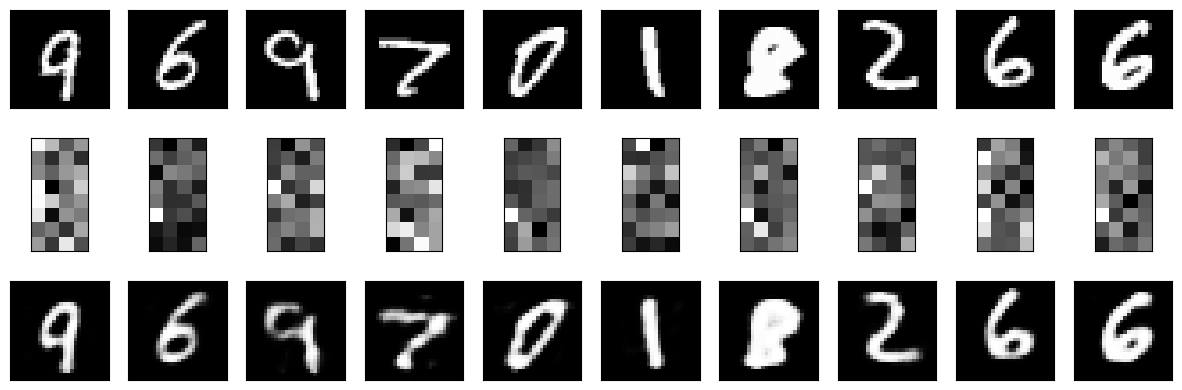

In [9]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])